In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pdb

<IPython.core.display.Javascript object>


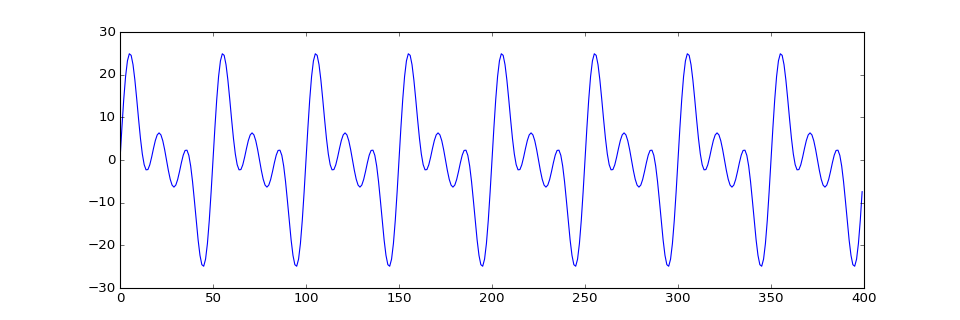

In [2]:
N = 400 # Plot N/Fs seconds
Fs = 100 # samples per second

def genSignal(N, Fs):
    signal = np.zeros(N)
    for freq in (2, 4, 6):
        t = np.arange(N)
        x = 10 * np.sin(2*np.pi*freq * (t/Fs))
        signal += x
        #plt.plot(x);
    
    return signal

fig = plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
signal = genSignal(N, Fs)

#plt.subplot(1,2,2)
#plt.plot(abs(signal));
plt.plot(signal);
fig.savefig('input.png')

Total Spikes: 56


<IPython.core.display.Javascript object>


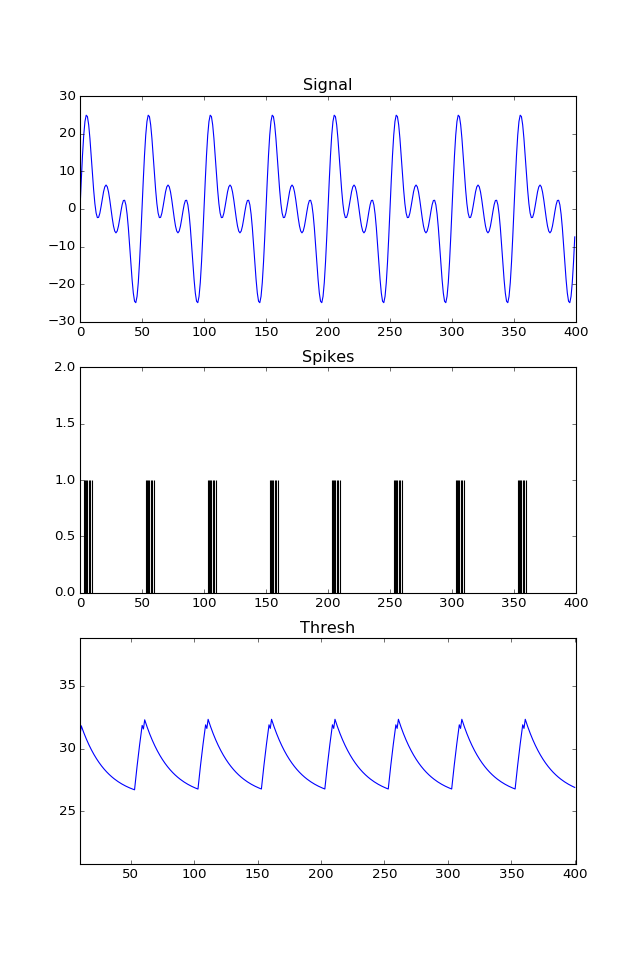

In [3]:
def pos (x):
    if x < 0:
        return 0
    return x

def spikeConvolve(signal):
    thresh = np.ones(N+1) * 26
    spikes = np.zeros(N)
    v = np.zeros(N)
    vTau = 10
    tTau = 20
    lastHit = 0
    for t in range(N):
        for b in range(N):
            if (t-b) < lastHit:
                break
            v[t] += pos(signal[t-b])* np.exp(-b/vTau)
            
            
            
            
            
        if v[t] > thresh[t]:
            v[t] = 0
            lastHit = t
            spikes[t] = 1
            
        for b in range(N):
            if (t-b) < 0:
                break
            thresh[t+1] += spikes[t-b] * np.exp(-b/tTau) 
    print ("Total Spikes: %d" % np.sum(spikes))
    return spikes, v, thresh
        

#plt.subplot(1,3,1)
spikes, v, thresh = spikeConvolve(signal)
#plt.plot(v);
#plt.plot(signal);
#plt.title("V and S")

if False:
    fig = plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.title("Spikes")
    plt.axis([0, N, 0, 2])
    plt.vlines(np.where(spikes >= 1), 0, 1);

    plt.subplot(1,2,2)
    plt.title("Thresh")
    plt.axis([10, len(thresh), 0, max(thresh) * 1.2])
    plt.plot(thresh);
else:
    fig = plt.figure(figsize=(8,12))
    plt.subplot(3,1,1)
    plt.title("Signal")
    plt.plot(signal);
    
    plt.subplot(3,1,2)
    plt.title("Spikes")
    plt.axis([0, N, 0, 2])
    plt.vlines(np.where(spikes >= 1), 0, 1);

    plt.subplot(3,1,3)
    plt.title("Thresh")
    plt.axis([10, len(thresh), min(thresh) * 0.8 , max(thresh) * 1.2])
    plt.plot(thresh);


fig.savefig('SpikesThreshold.png')

<IPython.core.display.Javascript object>


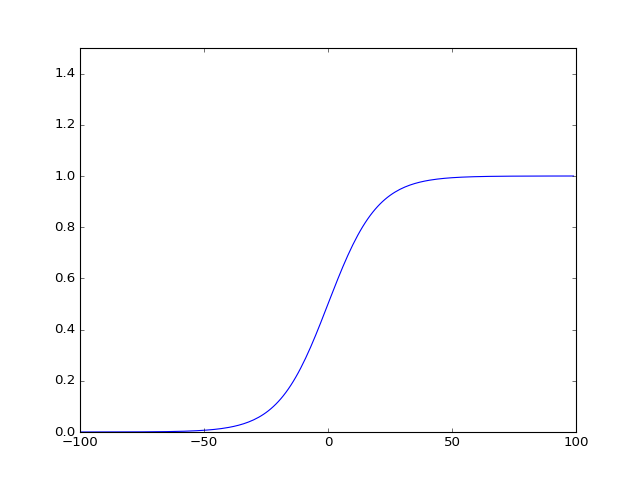

In [4]:
def sigmoid(t):
    tau = 10
    return 1./(1+np.exp(-t/tau))
T = 100
x = np.arange(-T,T)
result = sigmoid(x)
plt.figure()
plt.axis([-T, T, 0, 1.5])
plt.plot(x, result)